# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [48]:
import pandas as pd

# Load the dataset
file_path = 'healthcare_dataset.csv'
healthcare_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
healthcare_data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [49]:
# Step 1: Data Cleaning and Transformation

# Check for missing values
missing_values = healthcare_data.isnull().sum()

# Convert date columns to datetime
healthcare_data['Date of Admission'] = pd.to_datetime(healthcare_data['Date of Admission'])
healthcare_data['Discharge Date'] = pd.to_datetime(healthcare_data['Discharge Date'])

# Checking data types and unique values for categorical columns
data_types = healthcare_data.dtypes

missing_values, data_types, healthcare_data.duplicated().sum()



(Name                  0
 Age                   0
 Gender                0
 Blood Type            0
 Medical Condition     0
 Date of Admission     0
 Doctor                0
 Hospital              0
 Insurance Provider    0
 Billing Amount        0
 Room Number           0
 Admission Type        0
 Discharge Date        0
 Medication            0
 Test Results          0
 dtype: int64,
 Name                          object
 Age                            int64
 Gender                        object
 Blood Type                    object
 Medical Condition             object
 Date of Admission     datetime64[ns]
 Doctor                        object
 Hospital                      object
 Insurance Provider            object
 Billing Amount               float64
 Room Number                    int64
 Admission Type                object
 Discharge Date        datetime64[ns]
 Medication                    object
 Test Results                  object
 dtype: object,
 0)

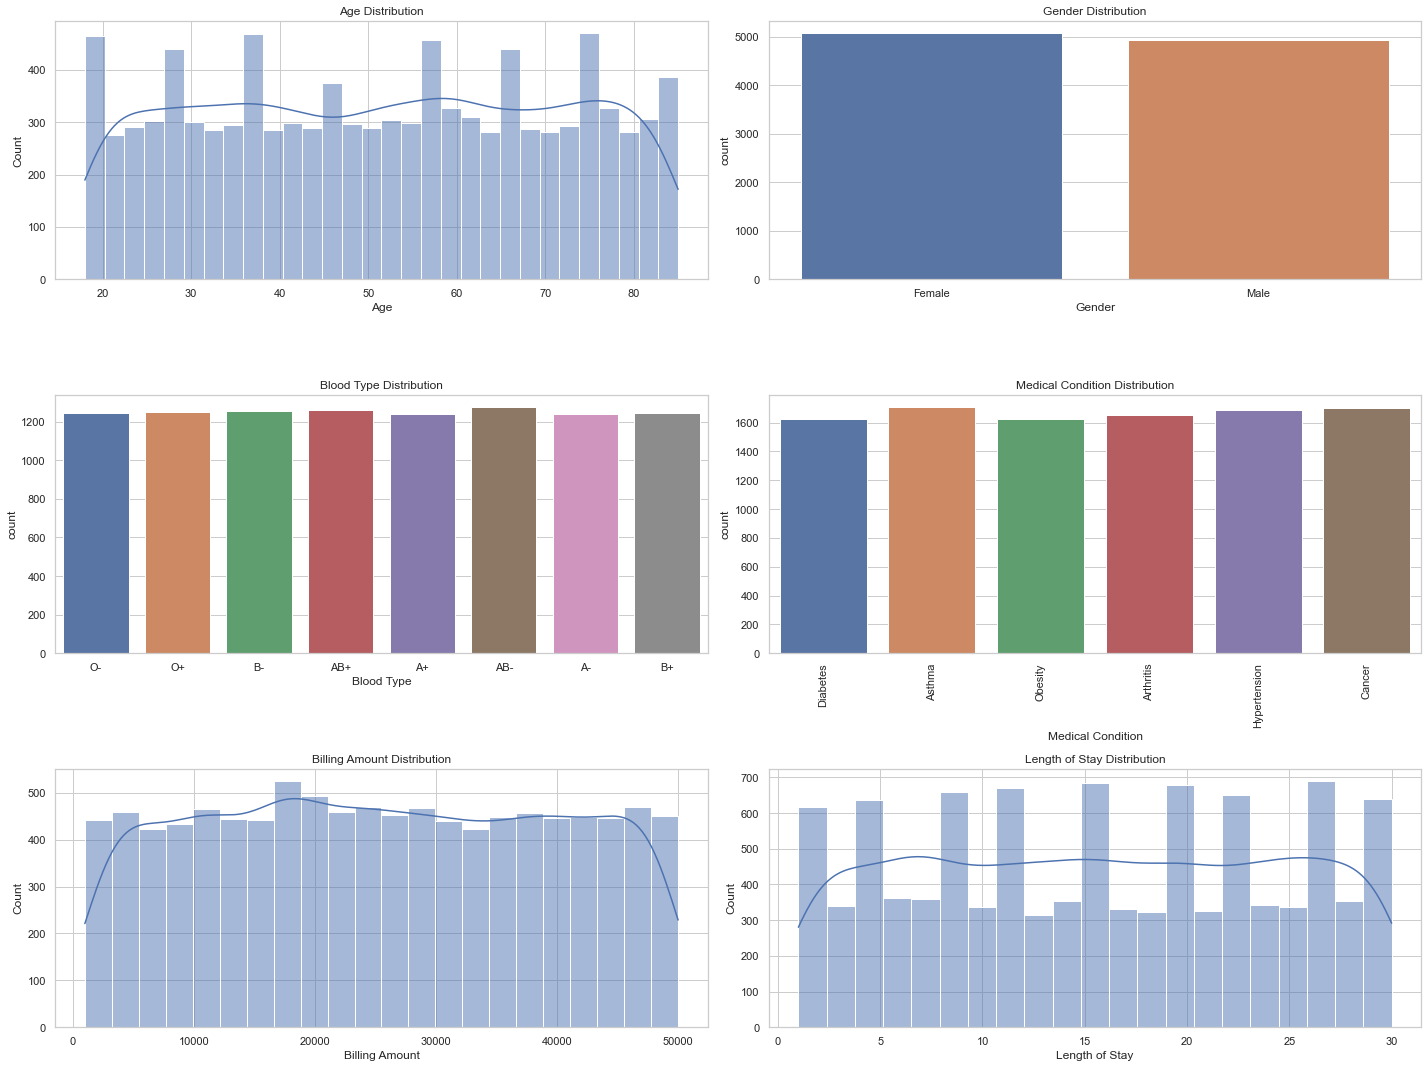

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

transformed_data = healthcare_data.copy()
# Setting the aesthetic style of the plots

# Creating a new feature 'Length of Stay'
transformed_data['Length of Stay'] = (transformed_data['Discharge Date'] - transformed_data['Date of Admission']).dt.days

# Dropping original date columns
transformed_data.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

sns.set_style("whitegrid")

# EDA: Visualization
plt.figure(figsize=(20, 15))

# Age distribution
plt.subplot(3, 2, 1)
sns.histplot(transformed_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# Gender distribution
plt.subplot(3, 2, 2)
sns.countplot(x='Gender', data=transformed_data)
plt.title('Gender Distribution')

# Blood Type distribution
plt.subplot(3, 2, 3)
sns.countplot(x='Blood Type', data=transformed_data)
plt.title('Blood Type Distribution')

# Medical Condition distribution
plt.subplot(3, 2, 4)
sns.countplot(x='Medical Condition', data=transformed_data)
plt.title('Medical Condition Distribution')
plt.xticks(rotation=90)

# Billing Amount distribution
plt.subplot(3, 2, 5)
sns.histplot(transformed_data['Billing Amount'], kde=True)
plt.title('Billing Amount Distribution')

# Length of Stay distribution
plt.subplot(3, 2, 6)
sns.histplot(transformed_data['Length of Stay'], kde=True)
plt.title('Length of Stay Distribution')

plt.tight_layout()
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataset for encoding
encoded_data = transformed_data.copy()

# Encoder object
le = LabelEncoder()

# Columns to encode
categorical_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 
                       'Admission Type', 'Medication', 'Test Results']

# Encoding categorical columns
for col in categorical_columns:
    encoded_data[col] = le.fit_transform(encoded_data[col])

# Displaying the first few rows of the encoded dataset
encoded_data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Length of Stay
0,Tiffany Ramirez,81,0,7,3,Patrick Parker,Wallace-Hamilton,3,37490.983364,146,0,0,1,14
1,Ruben Burns,35,1,6,1,Diane Jackson,"Burke, Griffin and Cooper",4,47304.064845,404,1,2,2,14
2,Chad Byrd,61,1,5,5,Paul Baker,Walton LLC,3,36874.896997,292,1,2,2,30
3,Antonio Frederick,49,1,5,1,Brian Chandler,Garcia Ltd,3,23303.322092,480,2,4,0,1
4,Mrs. Brandy Flowers,51,1,7,0,Dustin Griffin,"Jones, Brown and Murray",4,18086.344184,477,2,3,2,24


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
X = encoded_data[['Age', 'Gender', 'Blood Type','Billing Amount', 'Admission Type','Medication','Test Results','Length of Stay']]
y = encoded_data['Medical Condition']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape



((8000, 8), (2000, 8), (8000,), (2000,))

In [53]:
# pip install xgboost

In [54]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    # print(classification_report(y_test, y_pred))
    print("accuracy score:",accuracy)
    print()


Model: Random Forest
accuracy score: 0.159

Model: XGBoost
accuracy score: 0.157

Model: KNN
accuracy score: 0.1695

Model: Logistic Regression
accuracy score: 0.166



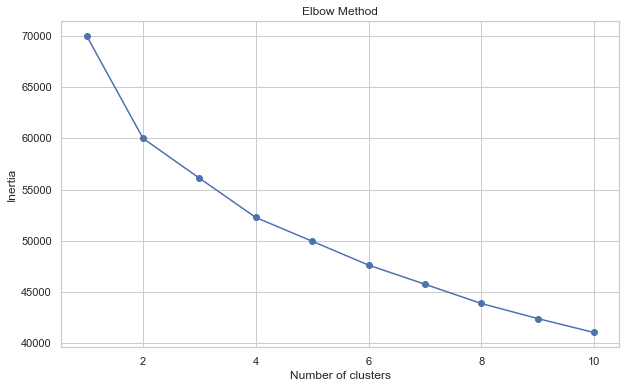

,Age,Billing Amount,Gender,Blood Type,Length of Stay,Medical Condition,Insurance Provider
Cluster,,,,,,,
0,51.821429,25258.501659,0.0,3.476320,15.690606,1.027950,2.003494
1,51.207243,25512.589856,1.0,3.558954,15.601207,0.992354,1.933602
2,51.388956,25717.228505,0.0,3.468988,15.538615,4.005202,2.014006
3,51.376639,25588.535933,1.0,3.501230,15.409426,3.996721,1.967213


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting a subset of features for clustering to reduce complexity
# We'll use numerical features that are most relevant
clustering_features = ['Age', 'Billing Amount', 'Gender','Blood Type','Length of Stay','Medical Condition','Insurance Provider']
clustering_data = encoded_data[clustering_features]

# Standardizing the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
# Choose the number of clusters and apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
encoded_data['Cluster'] = kmeans.fit_predict(clustering_scaled)

clustered_data_display = encoded_data[['Age', 'Billing Amount','Gender','Blood Type','Length of Stay','Medical Condition','Insurance Provider', 'Cluster']]

clustered_groups = clustered_data_display.groupby('Cluster').mean()
clustered_groups